### Тематическое моделирование 



__Важно__: Во второй половине ноутбука мы будем работать с библиотекой BigARTM, запускать которую удобнее всего в google colab (ниже будет код для установки библиотеки в colab), или с помощью Docker-образа. Если вы планируете работать с использованием Docker, сперва запустите его и работайте с ноутбуком внутри окружения, чтобы не делать предобработку данных дважды. Инструкция ниже.


Есть несколько сценариев работы с BigARTM, среди которых:

- установка библиотеки для Питона: инструкция [здесь](https://bigartm.readthedocs.io/en/stable/installation/index.html)

- запуск Docker образа с библиотекой

Если вы предпочтете второй сценарий, вам нужно:
1. Скачать и установить [Docker](https://www.docker.com/get-started) для своей ОС. Запустить Docker. 
2. Скачать образ (Dockerfile), в котором устанавливается большинство библиотек для анализа данных, Jupyter Notebook и сама BigARTM. Ссылка на файл лежит рядом со ссылкой на этот ноутбук в материалах недели.
3. Собрать образ: это можно сделать через командную строку (находясь в папке, где лежит скачанный в п.2 Dockerfile):

$ docker build -t artm .

$ docker run -p 8888:8888 artm

После выполнения этих двух команд запустится Jupyter Notebook, в командной строке будет написан путь к нему в таком формате:

Or copy and paste one of these URLs:
        http://de0ad378d760:8888/?token=5897bc15b494ca17f0d996763a8d05a71f1170af3455e96d
     or http://127.0.0.1:8888/?token=5897bc15b494ca17f0d996763a8d05a71f1170af3455e96d   

Откройте любой из URL, там поднят Jupyter Notebook с уже установленными библиотеками.

При работе не забывайте, что все ноутбуки, которые вы создаете внутри этого Docker образа, исчезнут, как только вы остановите Docker, поэтому перед окончанием работы скачайте ноутбук с результатом себе на компьютер.


Построим тематические модели для корпуса новостей Lenta.ru, с которым мы уже работали ранее.

In [1]:
# !wget https://github.com/yutkin/Lenta.Ru-News-Dataset/releases/download/v1.0/lenta-ru-news.csv.gz

In [2]:
# !pip install corus

In [3]:
from corus import load_lenta

In [4]:
path = 'lenta-ru-news.csv.gz'
records = load_lenta(path)
next(records)

LentaRecord(
    url='https://lenta.ru/news/2018/12/14/cancer/',
    title='Названы регионы России с\xa0самой высокой смертностью от\xa0рака',
    text='Вице-премьер по социальным вопросам Татьяна Голикова рассказала, в каких регионах России зафиксирована наиболее высокая смертность от рака, сообщает РИА Новости. По словам Голиковой, чаще всего онкологические заболевания становились причиной смерти в Псковской, Тверской, Тульской и Орловской областях, а также в Севастополе. Вице-премьер напомнила, что главные факторы смертности в России — рак и болезни системы кровообращения. В начале года стало известно, что смертность от онкологических заболеваний среди россиян снизилась впервые за три года. По данным Росстата, в 2017 году от рака умерли 289 тысяч человек. Это на 3,5 процента меньше, чем годом ранее.',
    topic='Россия',
    tags='Общество',
    date=None
)

In [5]:
data = [(record.title, record.topic, record.text, record.tags) for record in records]

In [6]:
import pandas as pd
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

<ipython-input-6-5b7176a9d163>:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('max_colwidth', -1)


In [7]:
data = pd.DataFrame(data, columns=['title','topic','text','tags'])

In [8]:
data.sample(3)

,title,topic,text,tags
115377,15-летняя дочь американского спринтера Гэя погибла в США,Спорт,"Дочь американского спринтера Тайсона Гэя скончалась после огнестрельного ранения в шею, полученного в ресторане города Лексингтон (штат Кентукки, США). Об этом сообщает The Mirror. 15-летняя Тринити сидела за своим столиком, когда группа людей на двух автомобилях устроила перестрелку рядом с рестораном. Одна из пуль случайно попала в девушку. Ее срочно госпитализировали, но спасти ей жизнь врачам не удалось. Тринити была единственной дочерью 34-летнего спринтера. Тайсон Гэй за свою карьеру завоевал три золотые и одну серебряную медаль чемпионатов мира. Его личный рекорд на дистанции 100 метров составляет 9,69 секунды, что является вторым результатом в истории. Быстрее Гэя эту дистанцию преодолел только Усэйн Болт из Ямайки (9,58 секунды).",
255317,«Спартак» обыграл «Анжи» на выезде,Спорт,"Московский «Спартак» обыграл на выезде махачкалинский «Анжи» — 1:0 — в матче 13-го тура футбольного первенства России. Об этом сообщается на сайте Российской футбольной премьер-лиги. Единственный мяч в игре забил Юра Мовсисян на 27-й минуте. Форвард «Спартака» добил мяч уже в пустые ворота после того, как голкипер «Анжи» Михаил Кержаков неудачно отбил удар Эйдена Макгиди. Несмотря на победный счет главный тренер «Спартака» Валерий Карпин остался недоволен игрой своей команды. «Я думаю, что это была, наверное, наша худшая игра со всех точек зрения. Футболисты говорили, что очень сухое поле плюс вообще непонятный ветер. Возможно, из-за этого, возможно, из-за того, что были в сборных. Но игра абсолютно не понравилась», — сказал Карпин в послематчевом интервью «НТВ-плюс Наш Футбол». После победы над «Анжи» «Спартак» набрал 27 очков и вышел на второе место в таблице. Красно-белых еще может догнать «Локомотив», который играет матч 13-го тура против «Амкара» 21 октября. Лидирует в премьер-лиге «Зенит» из Санкт-Петербурга, у которого 32 очка. 18 октября питерцы в первом матче 13-го тура обыграли ЦСКА со счетом 2:0.",Футбол
512161,В Чикаго грузовик протаранил автобусную остановку,Мир,"В американском городе Чикаго грузовик на большой скорости врезался в автобусную остановку, после чего влетел на лестницу, ведущую в метро, передает агентство AP. В результате инцидента две женщины погибли, и 21 человек получил ранения, из них 11 человек, в том числе четверо детей, находятся в критическом состоянии. Авария произошла в час пик на опасной развязке дороги, где интервал между сменой сигнала светофора очень короткий. По словам свидетелей, водитель грузовика даже не пытался затормозить. Он получил в аварии незначительные повреждения и вскоре был отпущен из больницы, откуда сотрудники полиции вывели его в наручниках, хотя, по словам полиции, пока ему не предъявлены никакие обвинения. На место происшествия были вызваны специалисты по работе с опасными веществами, так как из топливного бака грузовика начало вытекать горючее.",Все


In [9]:
len(data)

739350

In [10]:
data.topic.value_counts().head(15)

Россия               160518
Мир                  136680
Экономика            79538 
Спорт                64421 
Культура             53803 
Бывший СССР          53402 
Наука и техника      53136 
Интернет и СМИ       44675 
Из жизни             27611 
Дом                  21734 
Силовые структуры    19596 
Ценности             7766  
Бизнес               7399  
Путешествия          6408  
69-я параллель       1268  
Name: topic, dtype: int64

### *Изменить тематики (минимум 3-ри тематики взять)*

Для ускорения вычислений оставим тексты из 3х тем:

In [11]:
topics = ['Интернет и СМИ', '69-я параллель', 'Силовые структуры']

data = data[data.topic.isin(topics)]
data.dropna(inplace=True)
len(data)

65539

### Предобработка


Все модели, с которыми мы будем работать далее, работают с предобработанными текстами, поэтому сперва проведем стандартную предобработку текста:

In [12]:
import re
import numpy as np
from nltk.corpus import stopwords
from tqdm.notebook import tqdm
from multiprocessing import Pool
# from pymystem3 import Mystem

In [13]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
# !pip install pymorphy2

In [15]:
import pymorphy2
morph = pymorphy2.MorphAnalyzer()

### К стоп словам добавлю список стоп слов который сформировал после предобработки и анализ рез-ов модели

In [16]:
# words_to_delete_01 = ["краснодарский", "край", "факт", "смерть", "летний", "воспитанник", 
#                    "сообщать", "ноябрь", "свой", "twitter", "первый", "это", "год", "сообщить", "сотрудник" ]

words_to_delete = ["краснодарский", "край", "факт", "смерть", "летний", "воспитанник", 
                   "сообщать", "ноябрь", "свой", "twitter", "первый", "это", "год", "сообщить", "сотрудник", "россия", "российский", "новый", "сумма", 
                   "который", "человек", "время", "стать", "всё", "весь", "день", "несколько", "друг", "женщина"]

In [17]:
words_regex = re.compile('\w+')

def find_words(text, regex = words_regex):
    tokens =  regex.findall(text.lower())
    return [w for w in tokens if w.isalpha() and len(w) >= 3]

stopwords_list = stopwords.words('russian')
stopwords_list.extend(words_to_delete)

# mystem = Mystem()
# def lemmatize(words, lemmer = mystem, stopwords = stopwords_list):
#     lemmas = lemmer.lemmatize(' '.join(words))
#     return [w for w in lemmas if not w in stopwords 
#             and w.isalpha()]

def lemmatize(words, lemmer = morph, stopwords = stopwords_list):
    lemmas = [lemmer.parse(w)[0].normal_form for w in words]
    return [w for w in lemmas if not w in stopwords 
            and w.isalpha()]

def preprocess(text):
    return (lemmatize(find_words(text)))

In [18]:
stopwords_list.count("год")

1

In [19]:
data.text.iloc[1]

'Директора завода «Электроприбор» Муталиба Эмиралиева обвинили в уклонении от уплаты налогов и хищении бюджетных средств в общей сложности более чем на 70 миллионов рублей. Об этом сообщают «Известия». В 2014 году Эмиралиев выиграл государственный контракт от Министерства обороны России на ремонт зенитно-ракетного комплекса «Форт» в Мурманске. Подрядчик должен был заменить вышедшие из строя блоки, ячейки, платы и другие высокоточные механизмы вооружения. Общую стоимость комплектующих оценили в 50 миллионов рублей. По версии следствия, Эмиралиев нанял выходцев с Украины, которые за бесценок сделали косметический ремонт оборудования. Он предоставил Минобороны поддельные документы с подтверждением расходов, согласно которым орудия якобы вывозили на ремонт в Пензу и вернули обратно восстановленными и пригодными к использованию. В действительности Эмиралиев не потратил на ремонт почти ничего. В ходе расследования было обнаружено, что обвиняемый использовал похожую схему при выполнении госко

In [20]:
print(preprocess(data.text.iloc[1]))

['директор', 'завод', 'электроприбор', 'муталиб', 'эмиралиев', 'обвинить', 'уклонение', 'уплата', 'налог', 'хищение', 'бюджетный', 'средство', 'общий', 'сложность', 'миллион', 'рубль', 'известие', 'эмиралиев', 'выиграть', 'государственный', 'контракт', 'министерство', 'оборона', 'ремонт', 'зенитный', 'ракетный', 'комплекс', 'форт', 'мурманск', 'подрядчик', 'должный', 'заменить', 'выйти', 'строй', 'блок', 'ячейка', 'плата', 'высокоточный', 'механизм', 'вооружение', 'общий', 'стоимость', 'комплектующие', 'оценить', 'миллион', 'рубль', 'версия', 'следствие', 'эмиралиев', 'нанять', 'выходец', 'украина', 'бесценок', 'сделать', 'косметический', 'ремонт', 'оборудование', 'предоставить', 'минобороны', 'поддельный', 'документ', 'подтверждение', 'расход', 'согласно', 'орудие', 'якобы', 'вывозить', 'ремонт', 'пенза', 'вернуть', 'обратно', 'восстановить', 'пригодный', 'использование', 'действительность', 'эмиралиев', 'потратить', 'ремонт', 'ход', 'расследование', 'обнаружить', 'обвинять', 'использ

Ниже мы оставим только случайные 10,000 текстов из нашей коллекции, чтобы ускорить вычисления:

In [21]:
data = data.sample(10000)
data.topic.value_counts()

Интернет и СМИ       6913
Силовые структуры    2911
69-я параллель       176 
Name: topic, dtype: int64

In [22]:
preprocessed_text = list(tqdm(map(preprocess, data['text']), total=len(data)))

In [32]:
data['text'] = preprocessed_text
data.sample(3)

/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,title,topic,text,tags
719035,Судебные приставы арестовали акции НТВ,Интернет и СМИ,"[понедельник, служба, судебный, пристав, москва, наложить, обеспечительный, арест, процент, акция, телекомпания, нтв, заявить, риа, новость, член, совет, директор, газпром, медиа, анатолий, блин, арест, наложить, решение, московский, арбитражный, суд, рассматривать, иск, газпром, медиа, медиа, мост, блин, пояснить, арест, пакет, производиться, реестродержатель, акция, каковой, данный, случай, являться, телекомпания, нтв, обеспечительный, арест, накладываться, запрет, продажа, передача, акция, иной, собственник, рассмотрение, дело, суд, существо, также, запрещать, голосовать, акция, рассмотрение, иск, взыскание, медиа, мост, процент, акция, нтв, назначить, февраль, напомнить, январь, дочерний, компания, газпром, медиа, leadville, invest, подать, суд, иск, отношение, телекомпания, нтв, гибралтарский, компания, media, most, capital, management, требование, передать, газпром, медиа, пакет, акция, ...]",Все
155331,Канье Уэста уличили в пользовании торрент-трекером,Интернет и СМИ,"[американский, рэпер, канье, уэст, опубликовать, снимка, монитор, компьютер, хотеть, показать, слушать, песня, музыкант, суфьян, стивенс, однако, читатель, обратить, внимание, компьютер, рэпер, открыть, вкладка, торрент, трекер, the, pirate, bay, mashable, пользовать, отреагировать, пост, канье, уэст, шутка, плохой, финансовый, положение, пользователь, предположить, рэпер, хватать, средство, покупка, музыка, вспомнить, недавний, заявление, уэст, долг, банк, составлять, миллион, доллар, канадский, диджей, выдвинуть, предположение, канье, уэст, пытаться, скачать, the, pirate, bay, приложение, serum, лицензионный, версия, стоить, доллар, кроме, пользователь, обратить, внимание, уэст, использовать, бесплатный, youtube, вместо, сервис, tidal, помощь, эксклюзивный, распространяться, последний, альбом, февраль, сообщаться, канье, уэст, обратиться, основатель, facebook, марка, цукерберг, просьба, дать, миллиард, доллар, ...]",Интернет
557404,Антивирус Symantec обнаружил ложную угрозу в Yahoo! Mail,Интернет и СМИ,"[антивирусный, пакет, symantec, ошибка, обнаружить, червь, feebs, бета, версия, почтовый, сервис, yahoo, mail, специалист, symantec, оперативно, исправить, база, вирусный, описание, час, обнаружение, ошибка, владелец, почтовый, ящик, yahoo, mail, мочь, проверять, почта, предупреждение, антивирусный, программа, the, register, напомнить, случай, ошибочный, обнаружение, угроза, антивирусный, программа, symantec, norton, antivirus, назвать, вредоносный, программа, visual, liturgy, разработать, англиканский, церковь, подобный, ошибка, появляться, программа, производитель, например, система, обеспечение, безопасность, microsoft, windows, live, onecare, подряд, считать, вирус, почтовый, сервис, gmail, mcafee, antivirus, посчитать, вирус, некоторый, компонент, microsoft, office, система, автоматический, обновление, программа, adobe]",Все


### *Анализ текста после предобработки*
По текстам видны явно лишние слова не относящиеся к тематикам, например тематика "Силовые структуры" слова "краснодарский, край, факт, смерть, летний, воспитанник,  это, сообщать, россия, ноябрь...." явно не относятся именно к этой теме, да и к остальным тоже, хотя например есть тематика "Россия" и слово "россия" явно к ней относится лучше чем к "Силовые структуры".
Я бы дополнительно поискал и удалил наиболее общие слова из текстов.

## Модель LDA


Первая модель, которую мы рассмотрим, LDA - латентное размещение Дирихле. Воспользуемся реализацией из библиотеки gensim.

In [24]:
# !pip install -U gensim

In [33]:
from gensim.models import *
from gensim import corpora

/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Модель использует векторное представление документов, например, мешок слов (bow), поэтому сперва создадим словарь:

In [34]:
dictionary = corpora.Dictionary(data['text'])

dictionary.filter_extremes(no_below = 10, no_above = 0.9) # игнорируем слова, которые встречаются реже 10 раз или составляют более 0.9 словаря 
dictionary.save('lenta.dict')

/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Векторизуем документы:

In [35]:
corpus = [dictionary.doc2bow(text) for text in data['text']]
corpora.MmCorpus.serialize('lenta.model', corpus) 

/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Теперь можем обучать модель:

In [36]:
%time lda = ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=7, chunksize=50, update_every=1, passes=2)

/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


CPU times: user 6.68 s, sys: 30.1 ms, total: 6.71 s
Wall time: 6.69 s


Посмотрим на получившиеся темы:

In [37]:
lda.show_topics(num_topics=10, num_words=10, formatted=True)

/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.009*"ребёнок" + 0.008*"журналист" + 0.007*"опубликовать" + 0.006*"слово" + 0.006*"подозревать" + 0.005*"рассказать" + 0.005*"мужчина" + 0.005*"квартира" + 0.005*"заявить" + 0.004*"девушка"'),
 (1,
  '0.015*"суд" + 0.011*"газета" + 0.009*"решение" + 0.008*"заявить" + 0.007*"информация" + 0.006*"глава" + 0.006*"журналист" + 0.006*"дело" + 0.006*"москва" + 0.006*"закон"'),
 (2,
  '0.014*"дело" + 0.011*"уголовный" + 0.010*"задержать" + 0.008*"управление" + 0.008*"полиция" + 0.008*"область" + 0.008*"следственный" + 0.007*"москва" + 0.007*"следствие" + 0.007*"данные"'),
 (3,
  '0.017*"военный" + 0.011*"самолёт" + 0.009*"система" + 0.007*"корабль" + 0.007*"также" + 0.007*"боевой" + 0.007*"ракета" + 0.007*"оборона" + 0.007*"сша" + 0.006*"истребитель"'),
 (4,
  '0.030*"компания" + 0.017*"миллион" + 0.014*"реклама" + 0.014*"доллар" + 0.014*"процент" + 0.011*"the" + 0.010*"интернет" + 0.008*"рекламный" + 0.008*"рынок" + 0.007*"газета"'),
 (5,
  '0.018*"канал" + 0.013*"телеканал" + 0.012

На полученные темы можно посмотреть, изобразив их на плоскости с помощью библиотеки __pyLDAvis__. Чтобы спроецировать темы на плоскость, внутри применяется PCA-разложение.

In [30]:
# !pip install pyLDAvis

In [38]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [39]:
%time vis_data = gensimvis.prepare(lda, corpus, dictionary)
pyLDAvis.display(vis_data)

/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/opt/conda/lib/python3.8/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


CPU times: user 2.01 s, sys: 361 ms, total: 2.37 s
Wall time: 3 s


### Попробую создать лист слов которые явно необходимо удалить

words_to_delete = ["краснодарский", "край", "факт", "смерть", "летний", "воспитанник", 
                   "сообщать", "ноябрь", "свой", "twitter", "первый", "это", "год", "сообщить", "сотрудник", "россия", "российский", "новый", "сумма", 
                   "который", "человек", "время", "стать", "всё", "весь", "день", "несколько", "друг", "женщина"]

Выбранные темы - topics = ['Интернет и СМИ', '69-я параллель', 'Силовые структуры']

Судя по топу слов видна сходимость с выбранными темами, например 1 и 4 топ слов в основном связан с "Интернет и СМИ", 5 связана с "Силовые структуры", с темой "69-я параллель" сходимостей не нашел

Посмотрим на метрики качества получившейся модели: перплексию и среднюю когерентность:

In [40]:
print(lda.log_perplexity(corpus))


/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


-7.921864959896083


In [41]:
print('Персплексия: ', np.exp(lda.log_perplexity(corpus)))

/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Персплексия:  0.00036272495284539485


In [42]:
coherence_model_lda = CoherenceModel(model=lda, texts=data['text'], dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Средняя когерентность: ', coherence_lda)

/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Средняя когерентность:  0.5314554669346433


### Средняя когерентность после чистки первого дополнения стоп слов понялась с 0.448 до 0.4699, по прежнему видны слова которые стоит удалить, например "россия", хоть и относится к теме Россия но встречается во многих тематиках что я думаю ухудшает рез-ты. После второго дополнения стоп слов когерентность поднялась до 0.531

Теперь можно подобрать оптимальное количество тем, опираясь на значение метрик:

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline

/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


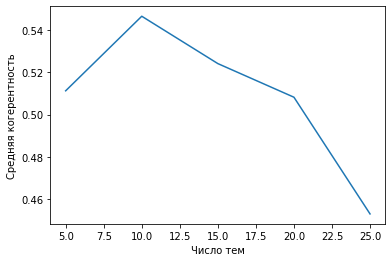

In [44]:
topics_list = [5, 10, 15, 20, 25]
coherences = []

for num in tqdm(topics_list):
    lda = ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=num, chunksize=50, update_every=1, passes=2)
    coherences.append(CoherenceModel(model=lda, texts=data['text'], dictionary=dictionary, coherence='c_v').get_coherence())

plt.plot(topics_list, coherences)
plt.xlabel("Число тем")
plt.ylabel("Средняя когерентность")
plt.show()

### После чистки первой версией стоп слов, оптимальным был вариант 15 тем, после чистки второй версией стоп слов стал оптимальнее вариант 10 тем.

Подробнее о метриках для оценки тематических моделей:
1. [Перплексия](http://qpleple.com/perplexity-to-evaluate-topic-models/)
2. Когерентность: [один пост](http://qpleple.com/topic-coherence-to-evaluate-topic-models/), [другой пост](https://towardsdatascience.com/evaluate-topic-model-in-python-latent-dirichlet-allocation-lda-7d57484bb5d0)

In [47]:
lda_10 = ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=10, chunksize=50, update_every=1, passes=2)
vis_data = gensimvis.prepare(lda_10, corpus, dictionary)
pyLDAvis.display(vis_data)

/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/opt/conda/lib/python3.8/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


На другие способы визуализации тематических моделей можно посмотреть [здесь](https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/#13.-t-SNE-Clustering-Chart).

### После чистки второй версией стоп слов по прежнему наблюдаются не нужные слова the, также, ... судя по практие чем лучше очистить входящие данные тем лучше будет рез-т.